In [1]:
import sys

sys.path.insert(1, '/Users/users/spirov/ThesisProject/Executable')

import os

import vaex

import numpy as np
import torch
from torch.utils.data import DataLoader
from torch import nn
from NeuralNets import CustomVaexDataset, printNodes, sc, StraightNetwork,Unet
from matplotlib import pyplot as plt

from DataCore import snapshotPath,L


from cycler import cycler


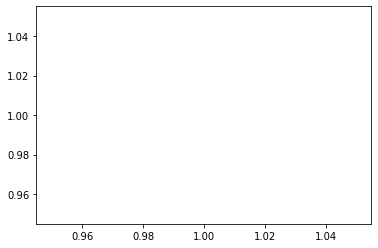

In [2]:


plt.plot([1],[1])

font = {"weight": "normal", "size": 14}
plt.rcParams["axes.linewidth"] = 1.5  # set the value globally
plt.rc("font", **font)
plt.rcParams["axes.facecolor"] = "white"
plt.rcParams["figure.facecolor"] = "white"
_legend = {"frameon": True, "framealpha":0.7}
plt.rc("legend", **_legend)
plt.rcParams["axes.prop_cycle"] = cycler("color",('indigo','b','r','k','#ff7f0e','g'))
plt.show()

In [3]:
dataPath = "/Users/users/spirov/Blk/Nexus Project/Thesis-Project-Cosmic-Web/Data/Training/"

lengt = len(os.listdir(dataPath))

In [15]:
CZs = []
Rs = []
fis = []
for i in range(lengt):
    fil = dataPath + os.listdir(dataPath)[i]
    df = vaex.open(fil)
    
    c = df.CZ.values
    r=df.R.values
    f=df.Fi.values
    t=df.Th.values
    
    CZs.append(c)
    Rs.append(r)
    fis.append(f)
    
    

In [5]:
CZs = np.reshape(CZs,np.size(CZs))
Rs = np.reshape(Rs,np.size(Rs))

<ipython-input-6-fad1dc578cff>:7: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  x=h[1][:-1][fw]
<ipython-input-6-fad1dc578cff>:9: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  plt.scatter(x,h[0][fw],c='b')


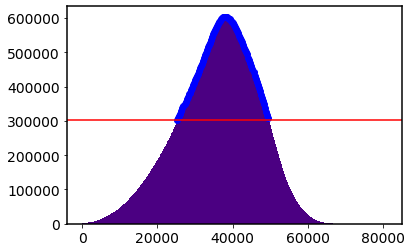

In [6]:
h = plt.hist(np.abs(CZs),300)
HM = h[0].max()/2
plt.axhline(HM,c='r')

fw = [h[0]>HM]

x=h[1][:-1][fw]

plt.scatter(x,h[0][fw],c='b')


plt.show()

In [7]:
FWHM = x[-1]-x[0]

In [8]:
FWHM/(2*np.sqrt(2*np.log(2)))

10184.042076665168

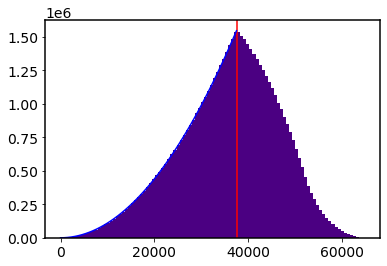

In [9]:

plt.hist(Rs,100)
plt.axvline(L/2,c='r')
x = np.linspace(0,L/2)
plt.plot(x,x**2/1e3*1.1)

plt.show()

In [38]:
i = np.arange(len(c))

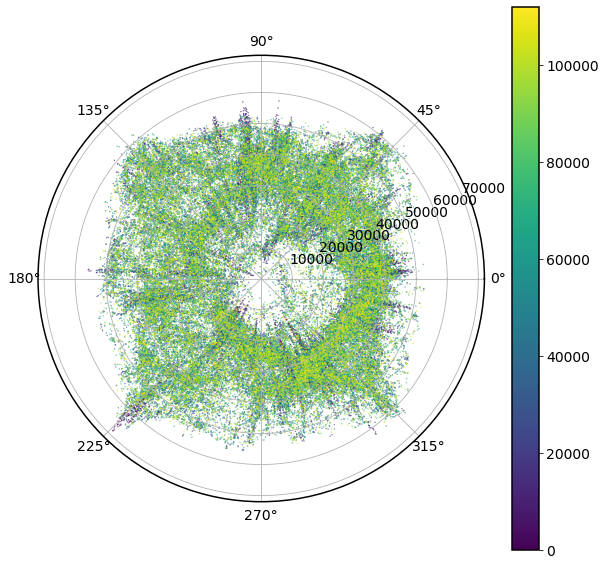

In [39]:
plt.figure(figsize=(10,10))
plt.subplot(projection="polar")

plt.scatter(f,c,s=0.1,c=i)
plt.colorbar()
plt.show()


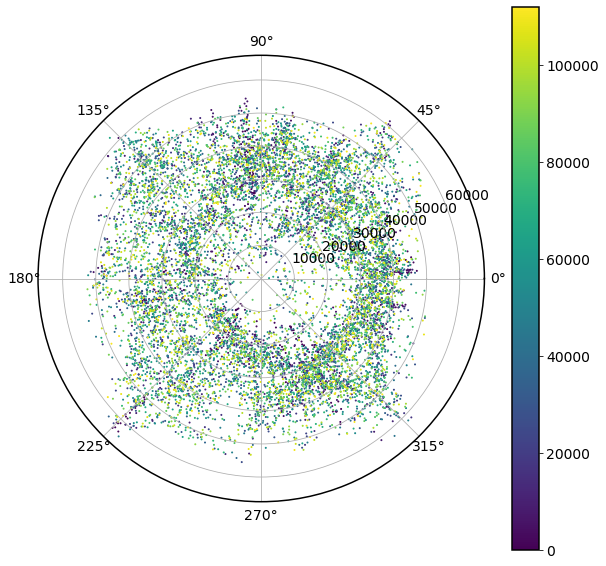

In [40]:
plt.figure(figsize=(10,10))
plt.subplot(projection="polar")

l = 10

plt.scatter(f[::l],c[::l],s=1,c=i[::l])
plt.colorbar()
plt.show()


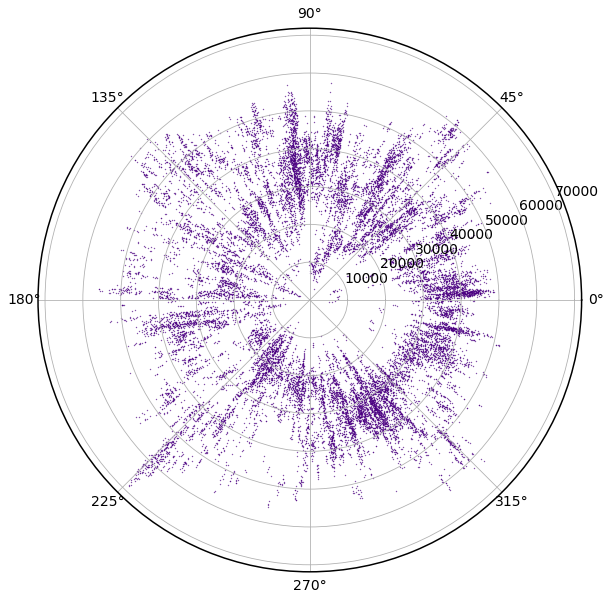

In [41]:
plt.figure(figsize=(10,10))
plt.subplot(projection="polar")

m = 20000

plt.scatter(f[:m],c[:m],s=0.1)

plt.show()


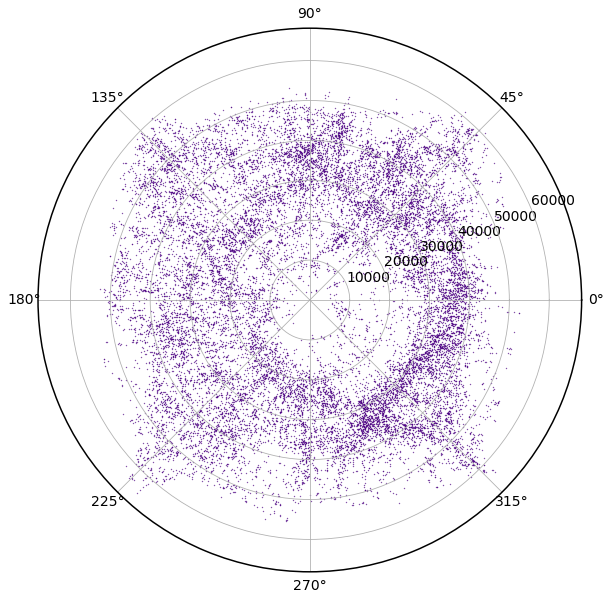

In [42]:
plt.figure(figsize=(10,10))
plt.subplot(projection="polar")

m = 20000

plt.scatter(f[m:2*m],c[m:2*m],s=0.1)
plt.show()


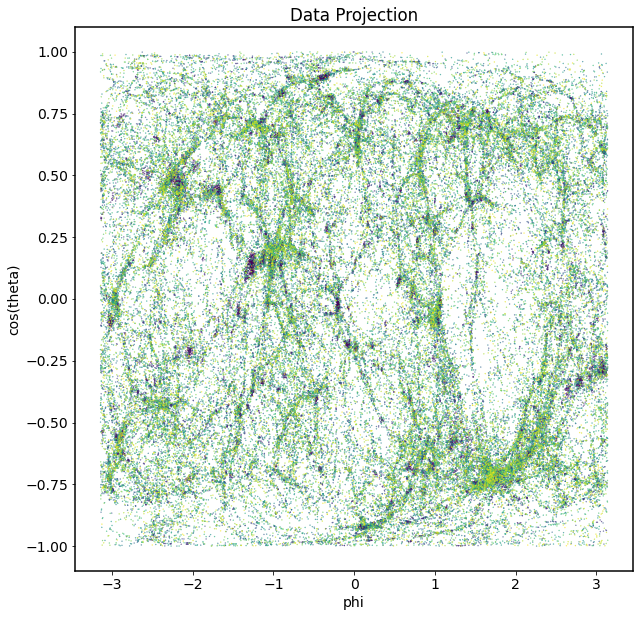

In [43]:
plt.figure(figsize=(10,10))

plt.scatter(f,np.cos(t),s=0.1,c=i)
plt.title("Data Projection")
plt.ylabel("cos(theta)")
plt.xlabel("phi")
plt.colorbar()
plt.show()


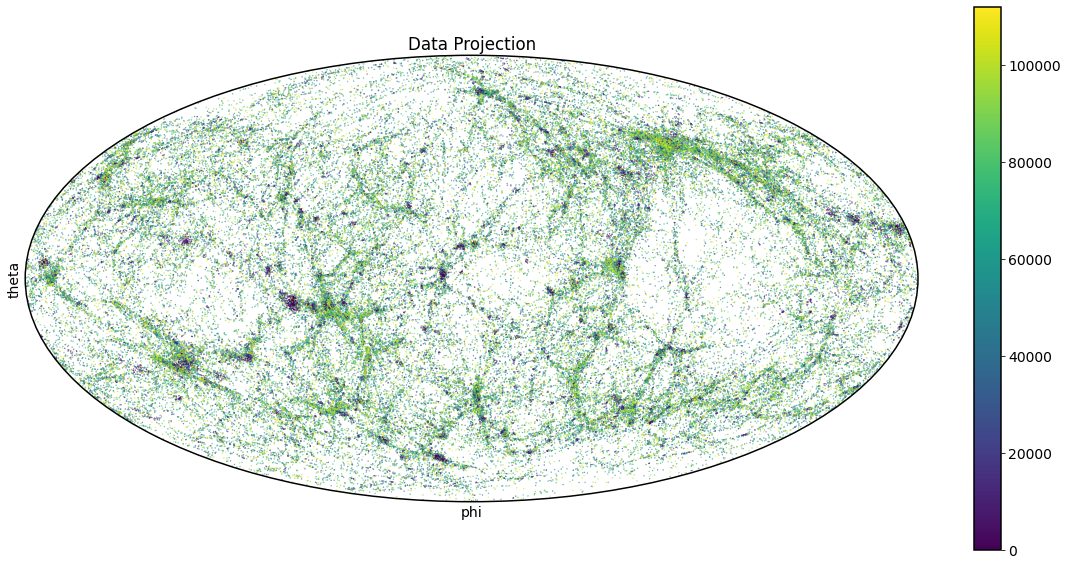

In [65]:
plt.figure(figsize=(20,10))
plt.subplot(projection="mollweide")

plt.scatter(f,t-np.pi/2,s=0.1,c=i)
plt.title("Data Projection")
plt.ylabel("theta")
plt.xlabel("phi")
plt.colorbar()
plt.tick_params(left = False, right = False , labelleft = False , 
                labelbottom = False, bottom = False) 
plt.show()


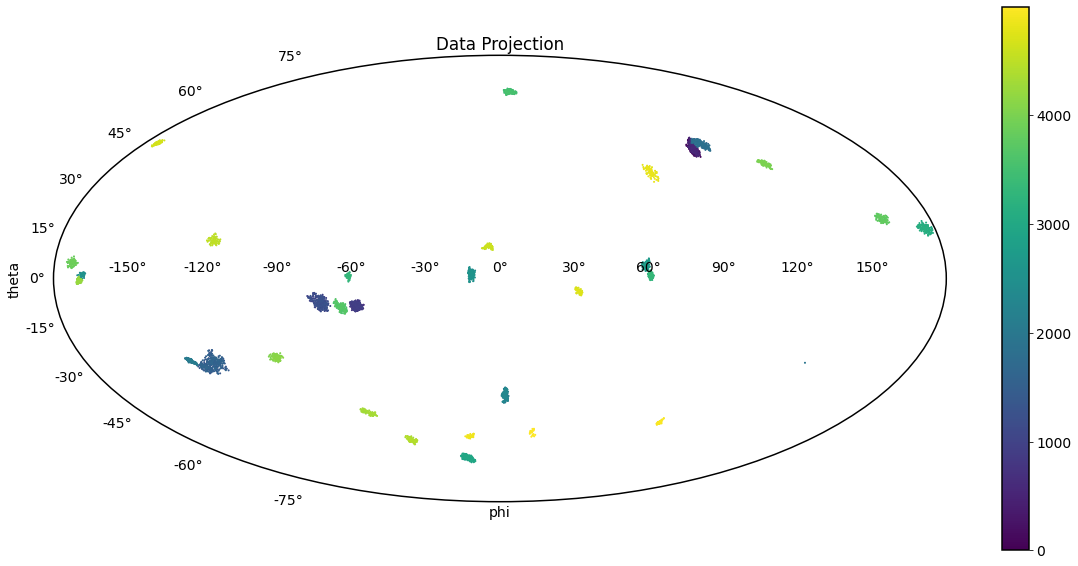

In [61]:
plt.figure(figsize=(20,10))
plt.subplot(projection="mollweide")

v = 5000

plt.scatter(f[:v],t[:v]-np.pi/2,s=1,c=i[:v])
plt.title("Data Projection")
plt.ylabel("theta")
plt.xlabel("phi")
plt.colorbar()
plt.show()
